In [4]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

import json

In [8]:
class category:
    electronics='electronics'
    grocery='grocery'
    clothing='clothing'
    books='books'
    patio='patio'
    
class Review:
    def __init__(self,category,text):
        self.text=text
        self.category=category
        
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews=reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    def get_category(self):
        return [x.category for x in self.reviews]

In [5]:

filenames=['Books_small.json','Clothing_small.json','Electronics_small.json','Grocery_small.json','Patio_small.json']
categories=['books','clothing','electronics','grocery','patio']

reviews=[]

for i in range(len(filenames)):
    with open(filenames[i]) as f:
        for line in f:
            review=json.loads(line)
            reviews.append(Review(categories[i],review['reviewText']))
            

In [9]:
training,test=train_test_split(reviews,test_size=0.33,random_state=42)

training_container=ReviewContainer(training)
train_x=training_container.get_text()
train_y=training_container.get_category()

test_container=ReviewContainer(test)
test_x=test_container.get_text()
test_y=test_container.get_category()

print(train_y.count(category.books))
print(train_y.count(category.clothing))
print(train_y.count(category.electronics))
print(train_y.count(category.grocery))
print(train_y.count(category.patio))


659
658
673
675
685


In [21]:
vectorizer=TfidfVectorizer()
train_x_vectors=vectorizer.fit_transform(train_x)
test_x_vectors=vectorizer.transform(test_x)


In [34]:
from sklearn import svm

clf_svm=svm.SVC(kernel='linear',C=0.5)
clf_svm.fit(train_x_vectors,train_y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:

test_set = ['great for my wedding', "loved it in my garden", 'good computer']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['electronics', 'clothing', 'electronics'], dtype='<U11')

In [32]:
print(clf_svm.score(test_x_vectors,test_y))

0.8412121212121212


In [35]:
f1_score(test_y,clf_svm.predict(test_x_vectors),average=None,labels=['books','clothing','electronics','grocery','patio'])

array([0.96396396, 0.89435601, 0.88529412, 0.92117465, 0.91883117])

In [37]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf'),'C':(0.5,1,1.3,1.6,4,7,9)}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters,cv=5)
clf.fit(train_x_vectors,train_y)

C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureW

C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureW

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.5, 1, 1.3, 1.6, 4, 7, 9),
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

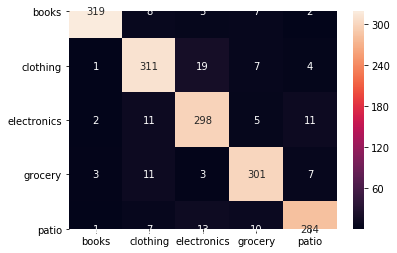

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

y_pred = clf.predict(test_x_vectors)

labels = ['books','clothing','electronics','grocery','patio']

cm = confusion_matrix(test_y, y_pred, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')